In [49]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Load Data
data=pd.read_csv('letter-recognition.csv')

In [3]:
# Check data
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
# Check data shape,info,desc and null values
data.shape

(20000, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [13]:
# Check mean,median and quantiles of data
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [17]:
data.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [8]:
data['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
Z    734
H    734
Name: letter, dtype: int64

In [35]:
d=data.drop('letter',axis=1)

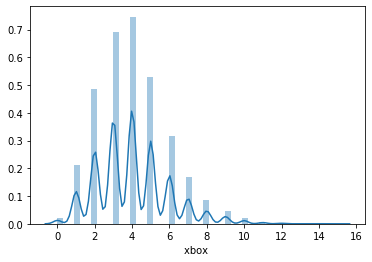

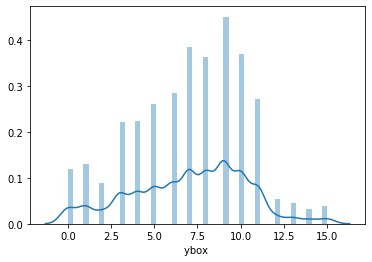

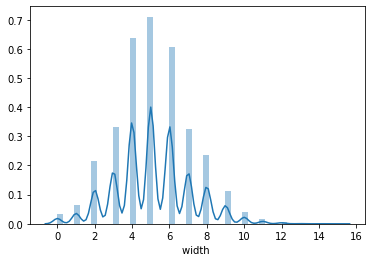

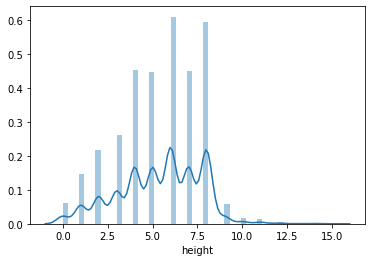

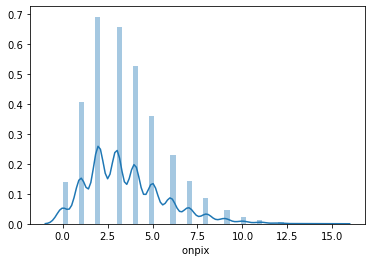

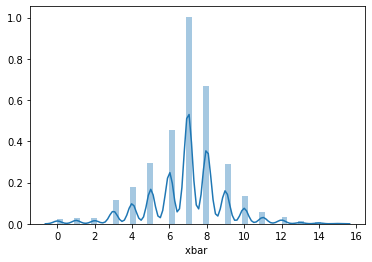

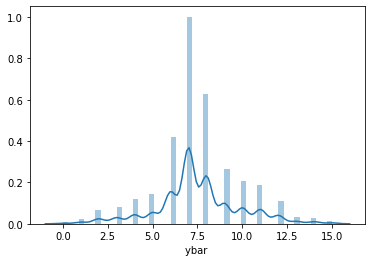

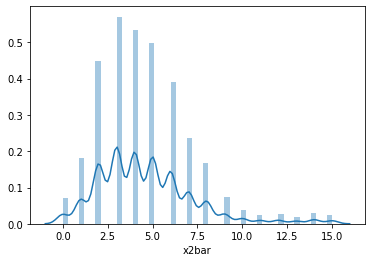

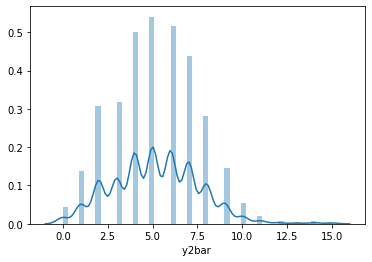

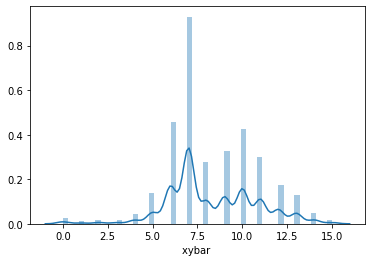

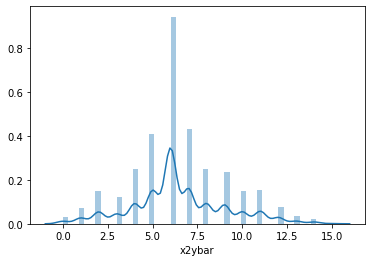

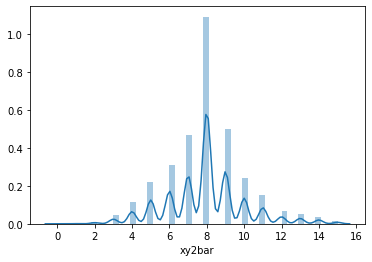

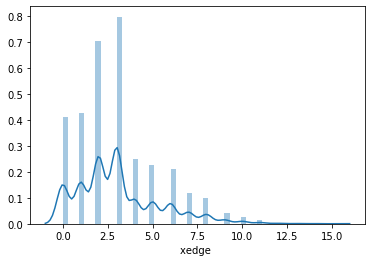

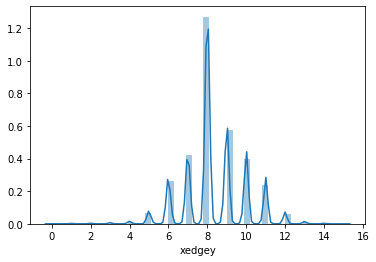

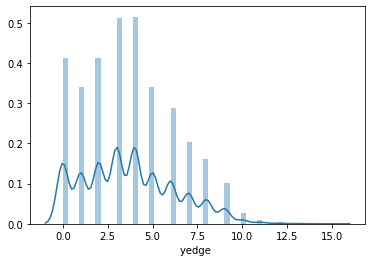

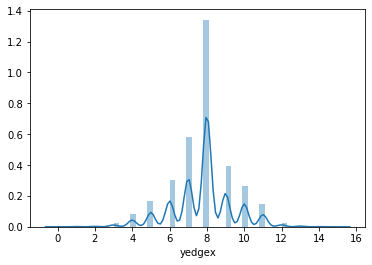

In [43]:
for i in d.columns:
    sns.distplot(d[i])
    plt.show()

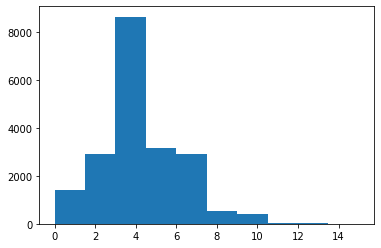

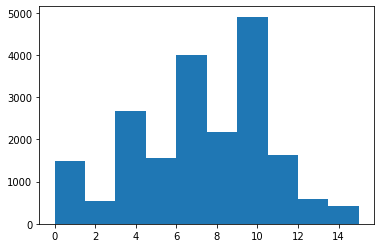

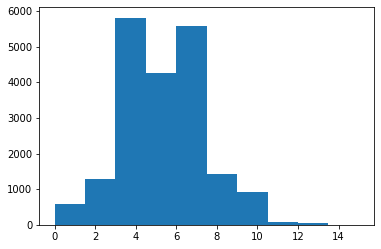

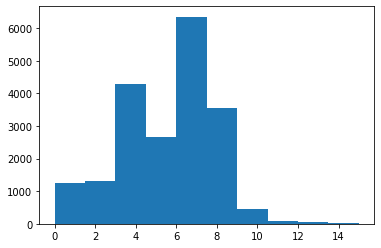

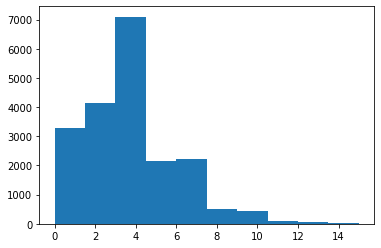

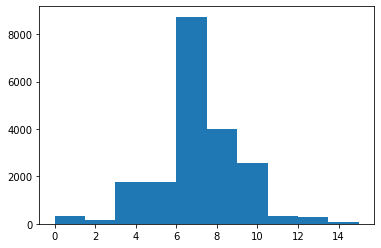

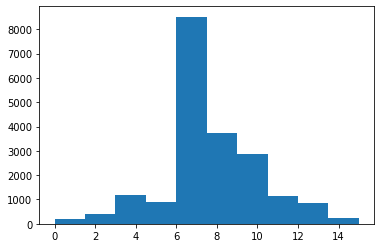

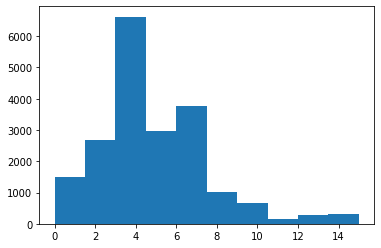

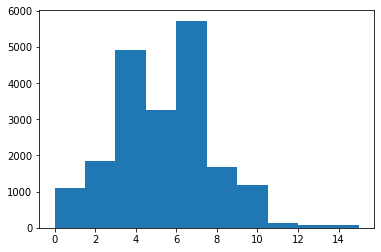

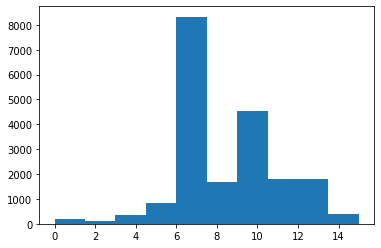

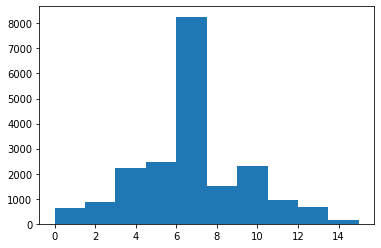

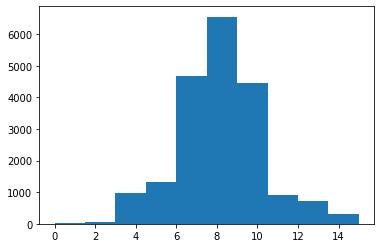

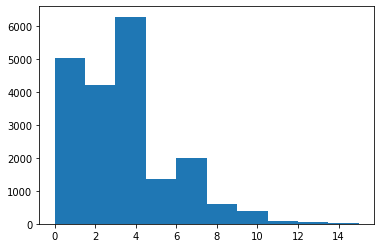

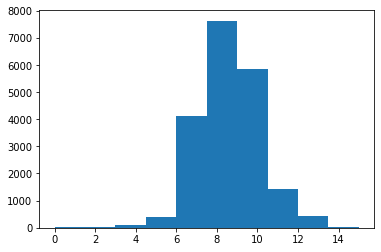

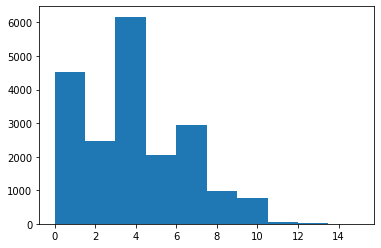

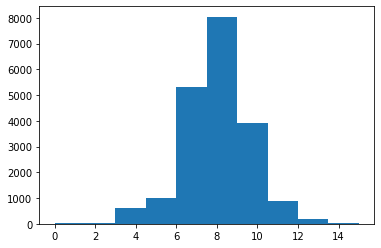

In [46]:
for i in d.columns:
    plt.hist(d[i])
    plt.show()

In [ ]:
# All datapoints are discrete in nature and have limited values

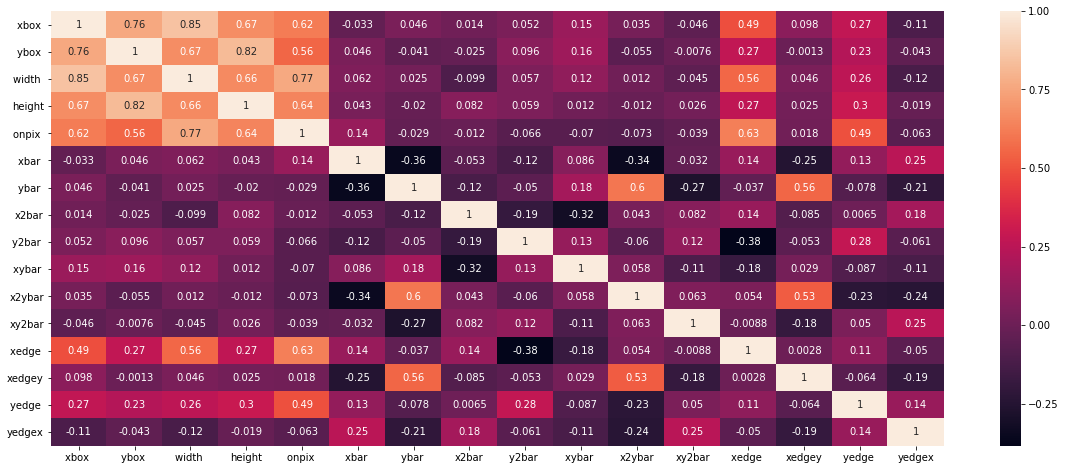

In [44]:
# Check correlation
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
# Select target as Y and rest as X for training
X = data.drop("letter", axis = 1)
y = data['letter']

In [13]:
# Check the shape of the data
X.shape,y.shape

((20000, 16), (20000,))

In [15]:
# Spliting the data into train and test for modeling and checking performance
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((16000, 16), (4000, 16), (16000,), (4000,))

In [ ]:
# Support vector machines are basically used for linearly separable data to separate into classes.

In [24]:
# Kernel is used to convert data from low dimension space to high dimension space.

In [18]:
# Apply linear Support vector classifier model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")



accuracy: 0.8545 



In [22]:
# Apply Non linear Support vector classifier model with poly feature
non_linear_model = SVC(kernel='poly')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

#accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.95075 



In [20]:
# Apply n dimensional Support vector classifier model also known as Gaussian kernel
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)
#accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9305 



In [23]:
## From above all 3 model we found that Polynomial kernel is given good accuracy so not check with cross validation technique

In [ ]:
folds = KFold(n_splits = 6, shuffle = True)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.1,0.001],
                     'C': [0.1,0.5]}]


# specify model
model = SVC(kernel="poly")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds,n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

In [ ]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=0.1, gamma=0.1, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy is", metrics.accuracy_score(y_test, y_pred), "\n")
print("prediction is", metrics.precision_score(y_test, y_pred,average='micro',pos_label='positive'), "\n")
print("recall is", metrics.recall_score(y_test, y_pred,average='micro',pos_label='positive'), "\n")
#print(metrics.confusion_matrix(y_test, y_pred), "\n")
